# Описание датасета

В качестве набора данных мы будем использовать набор данных прогнозирования инсульта:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

- Age: возраст пациента [лет] 
- Sex: пол пациента [M: Мужской, F: Женский] 
- ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная] 
- RestingBP: артериальное давление в состоянии покоя [мм рт.ст.] 
- Cholesterol: холестерин сыворотки [мм/дл] 
- FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе] 
- RestingECG: результаты электрокардиограммы в покое [Normal: нормальная, ST: аномалия ST-T (инверсия T и/или элевация или депрессия ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса] 
- MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
- ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]
- Oldpeak: oldpeak: ST [Числовое значение, измеренное в депрессии]
- ST_Slope: наклон сегмента ST пикового упражнения [Up: восходящий, Flat: плоский, Down: нисходящий]
- HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

# Импорт библиотек

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [2]:
#first_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
first_data = pd.read_csv('heart.csv')

In [3]:
# Удалим дубликаты записей, если они присутствуют
data = first_data.drop_duplicates()

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасета

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
# Список колонок
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Построение графиков для понимания структуры данных

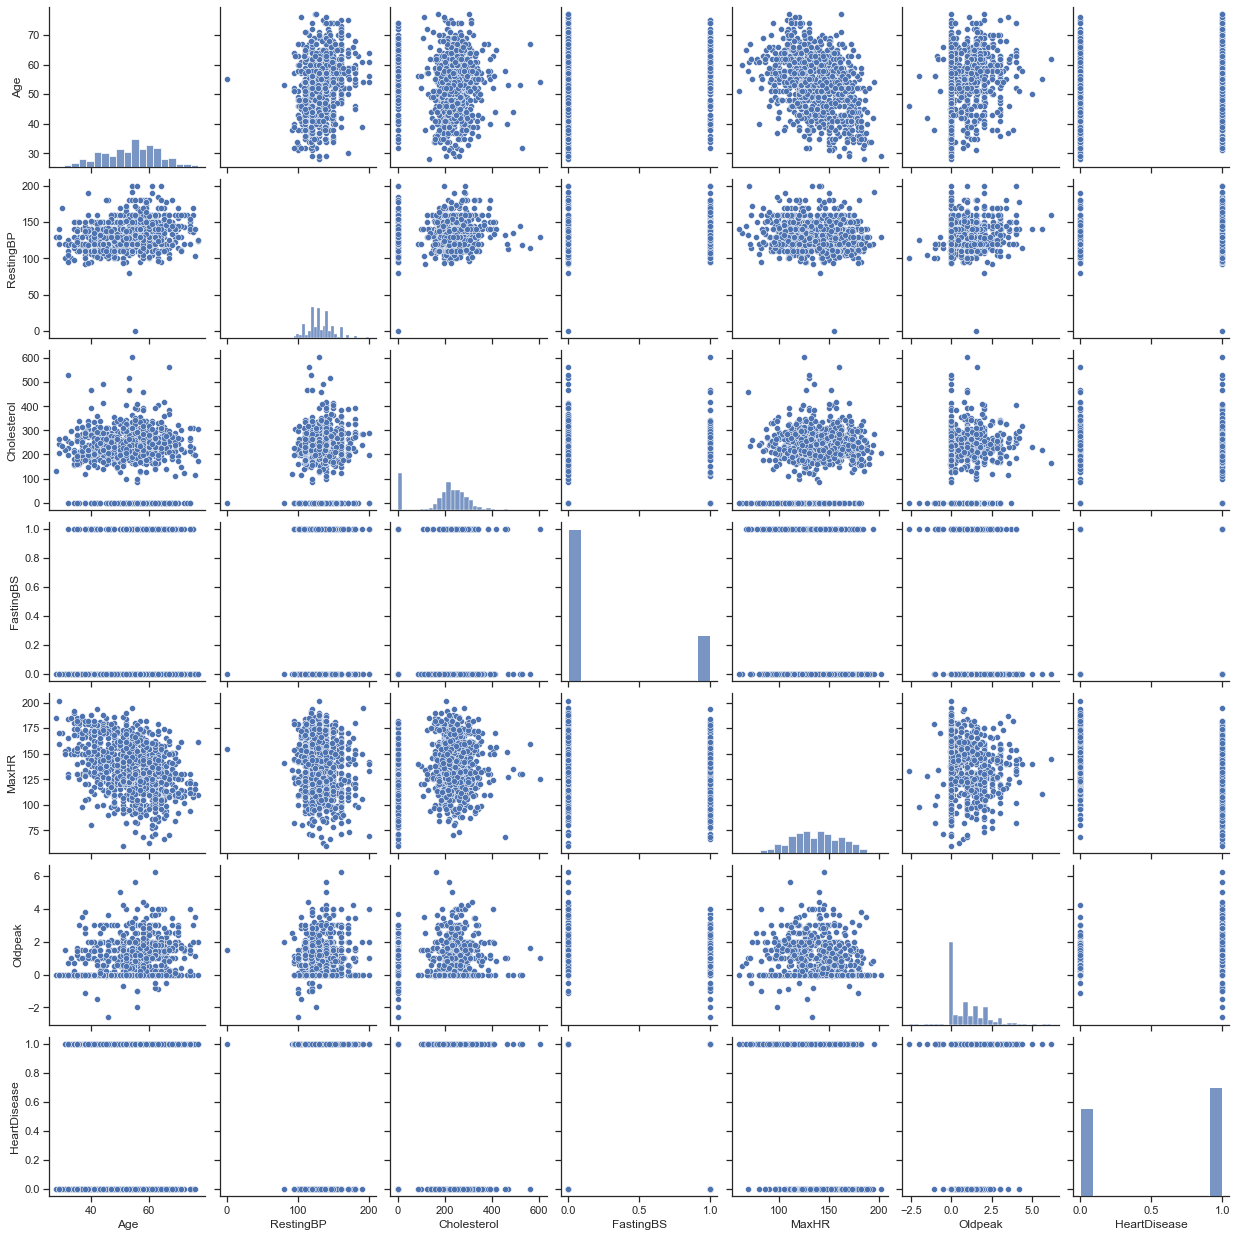

In [9]:
# Парные диаграммы
sns.pairplot(data)

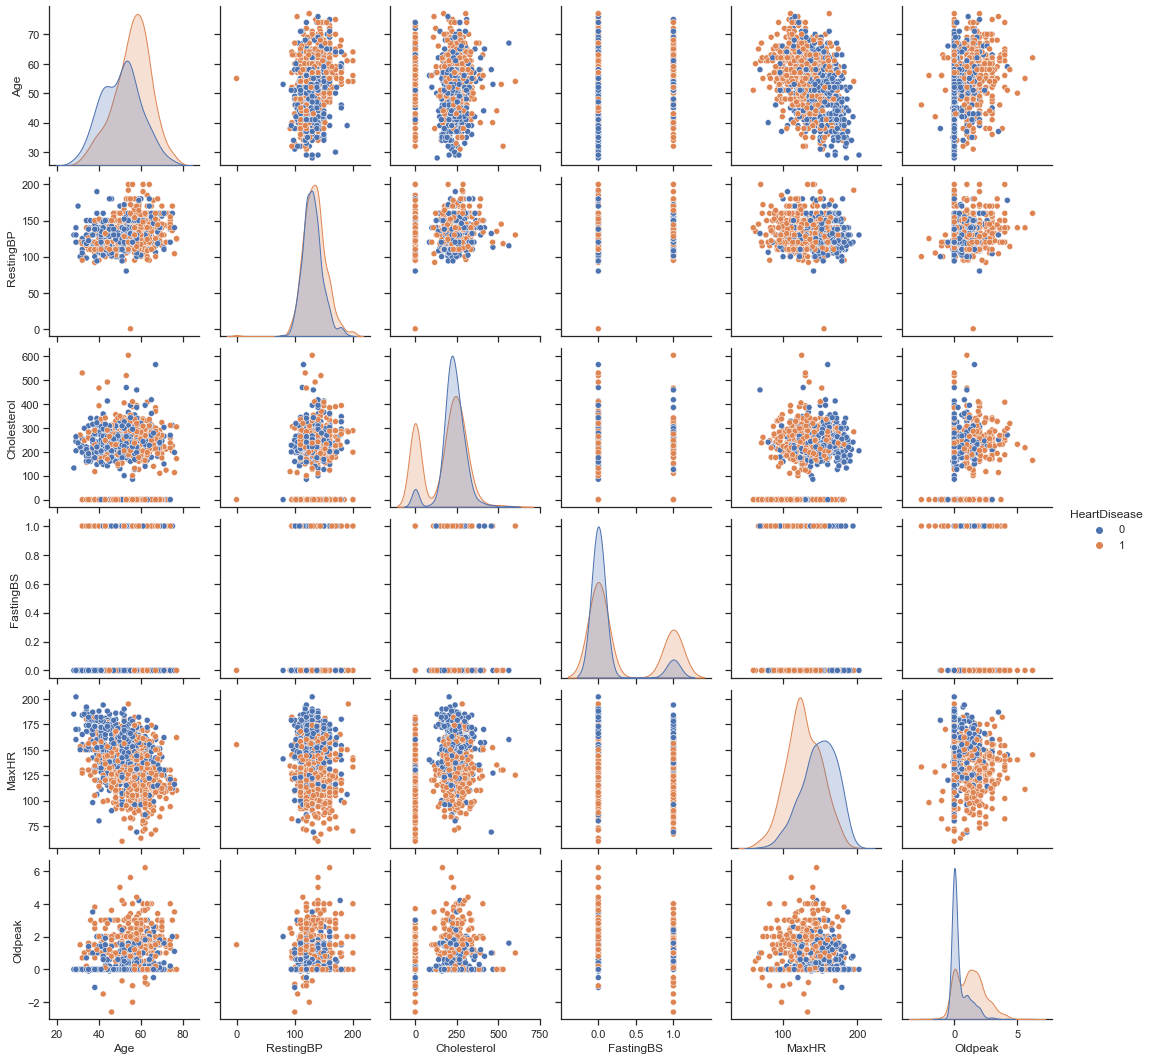

In [10]:
sns.pairplot(data, hue="HeartDisease")

In [11]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['HeartDisease'].unique()

array([0, 1], dtype=int64)

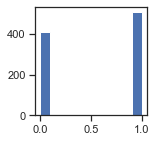

In [12]:
# Оценим дисбаланс классов для stroke
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['HeartDisease'])
plt.show()

In [13]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [14]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['HeartDisease'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 55.34%, а класс 1 составляет 44.66%.


Вывод. Классы практически сбалансированы.

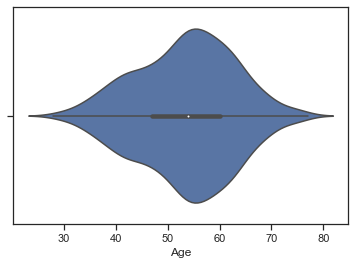

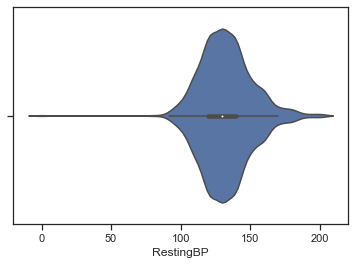

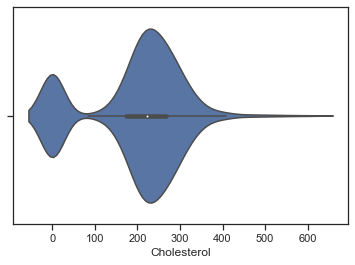

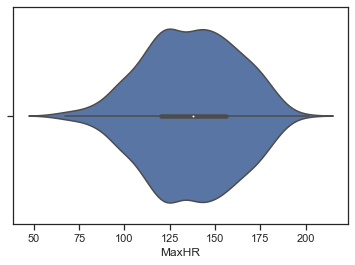

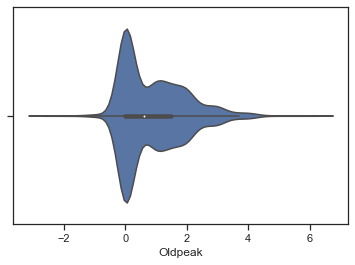

In [15]:
# Скрипичные диаграммы для числовых колонок
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    sns.violinplot(x=data[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [16]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Категориальные признаки присутствуют, закодируем их.

In [17]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [18]:
Sex = LabelEncoder()
code_Sex = Sex.fit_transform(data["Sex"])
data["Sex"] = code_Sex
data = data.astype({"Sex":"int64"})
np.unique(code_Sex)

array([0, 1])

In [19]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [20]:
ChestPainType = LabelEncoder()
code_ChestPainType = ChestPainType.fit_transform(data["ChestPainType"])
data["ChestPainType"] = code_ChestPainType
data = data.astype({"ChestPainType":"int64"})
np.unique(code_ChestPainType)

array([0, 1, 2, 3])

In [21]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [22]:
RestingECG = LabelEncoder()
code_RestingECG = RestingECG.fit_transform(data["RestingECG"])
data["RestingECG"] = code_RestingECG
data = data.astype({"RestingECG":"int64"})
np.unique(code_RestingECG)

array([0, 1, 2])

In [23]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [24]:
ExerciseAngina = LabelEncoder()
code_ExerciseAngina = ExerciseAngina.fit_transform(data["ExerciseAngina"])
data["ExerciseAngina"] = code_ExerciseAngina
data = data.astype({"ExerciseAngina":"int64"})
np.unique(code_ExerciseAngina)

array([0, 1])

In [25]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [26]:
ST_Slope = LabelEncoder()
code_ST_Slope = ST_Slope.fit_transform(data["ST_Slope"])
data["ST_Slope"] = code_ST_Slope
data = data.astype({"ST_Slope":"int64"})
np.unique(code_ST_Slope)

array([0, 1, 2])

In [27]:
# Числовые колонки для масштабирования
scale_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [28]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [29]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [30]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_scaled,RestingBP_scaled,Cholesterol_scaled,MaxHR_scaled,Oldpeak_scaled
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0.244898,0.70,0.479270,0.788732,0.295455
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0.428571,0.80,0.298507,0.676056,0.409091
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0.183673,0.65,0.469320,0.267606,0.295455
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0.408163,0.69,0.354892,0.338028,0.465909
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.530612,0.75,0.323383,0.436620,0.295455


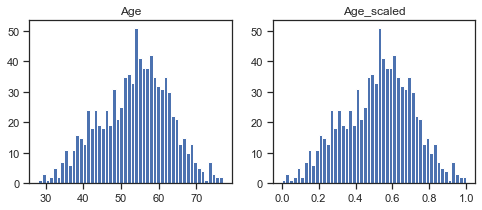

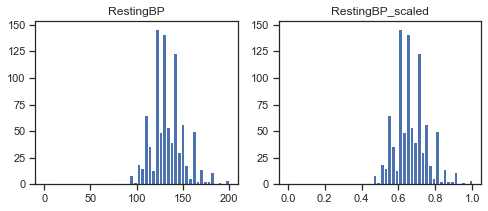

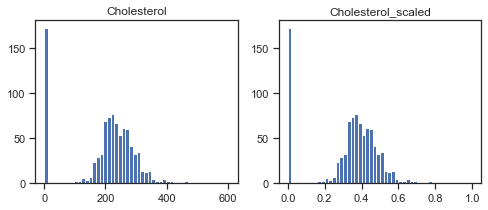

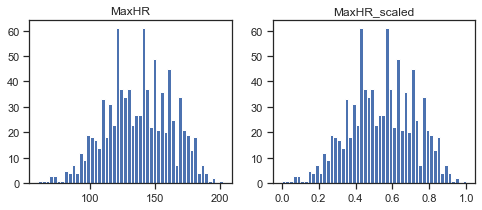

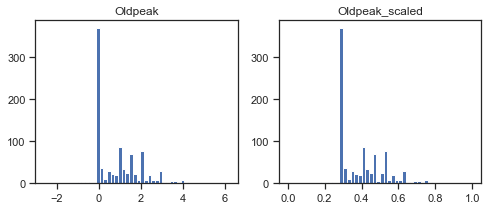

In [31]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [32]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['HeartDisease']
corr_cols_1

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

In [ ]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['HeartDisease']
corr_cols_2

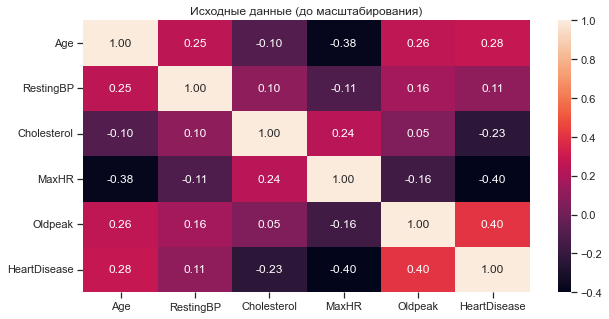

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

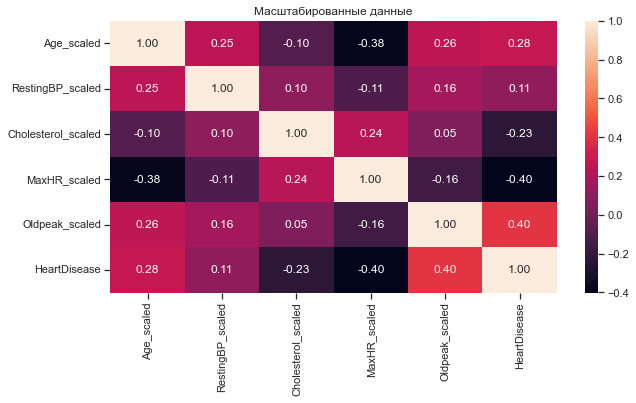

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак классификации "HeartDisease" наиболее сильно коррелирует с Oldpeak (0.4) и MaxHR (-0.4). Эти признаки обязательно следует оставить в модели классификации.

# Выбор метрик для последующей оценки качества моделей.

В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:

Метрика precision: Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Метрика recall (полнота): Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Метрика F1-мера: Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall:

Метрика ROC AUC:

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

# Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [37]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:

- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, data.HeartDisease, random_state=1)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((688, 17), (688,), (230, 17), (230,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [55]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [56]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [60]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [66]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, X_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

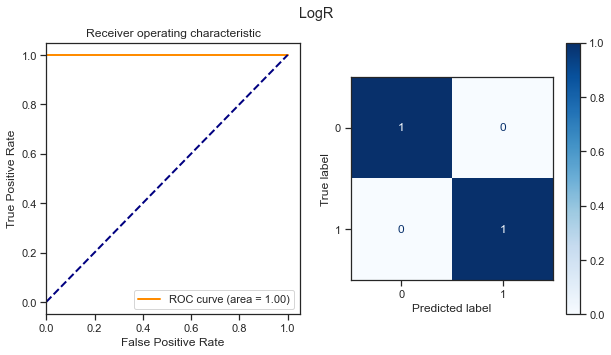

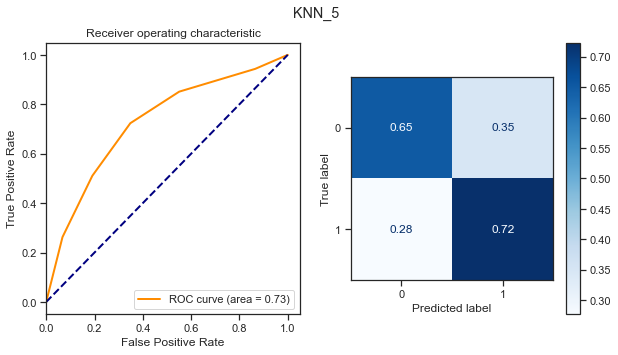

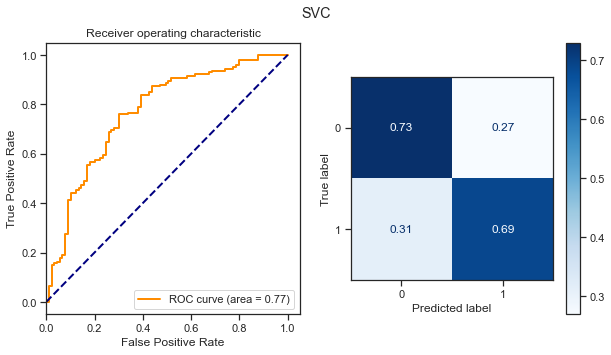

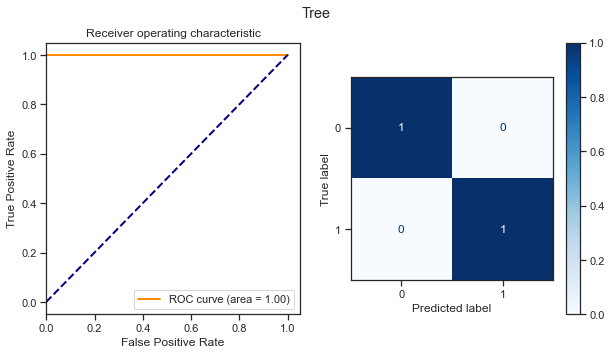

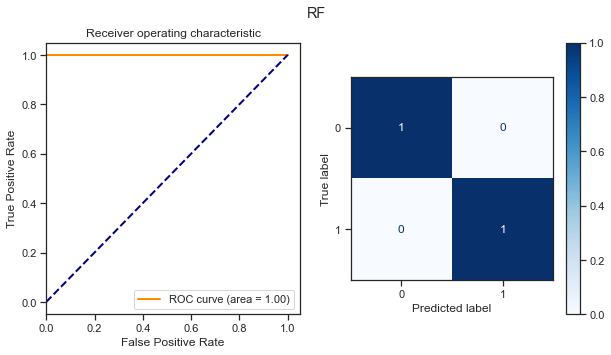

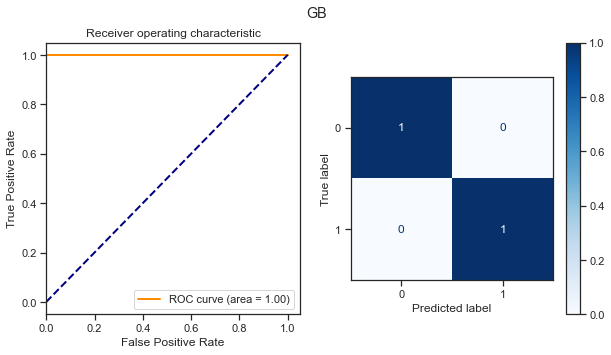

In [69]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

Логистическая регрессия

# Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [70]:
X_train.shape

(688, 17)

In [71]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [72]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [74]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

Wall time: 2.24 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [75]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=100)

In [76]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 100}

In [77]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'100'

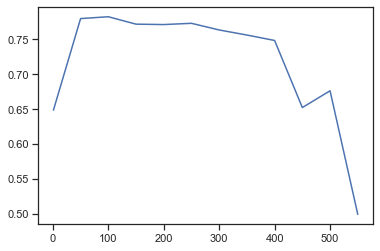

In [78]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [79]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

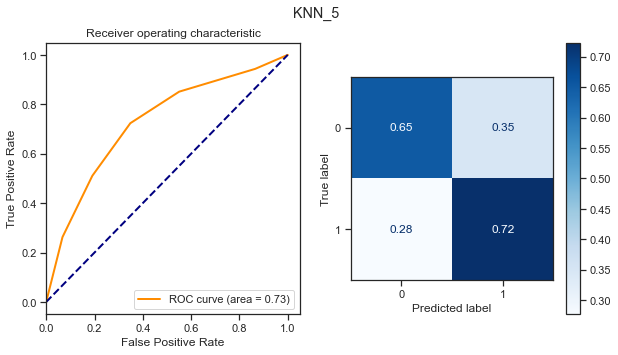

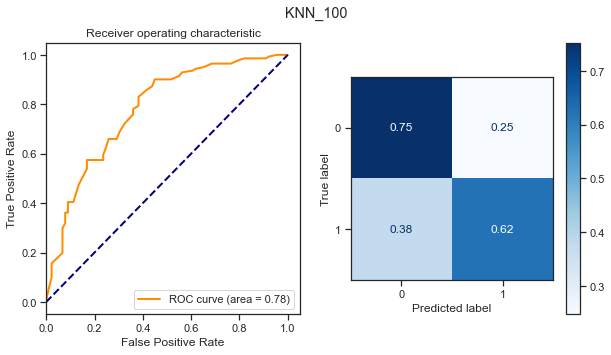

In [80]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [82]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

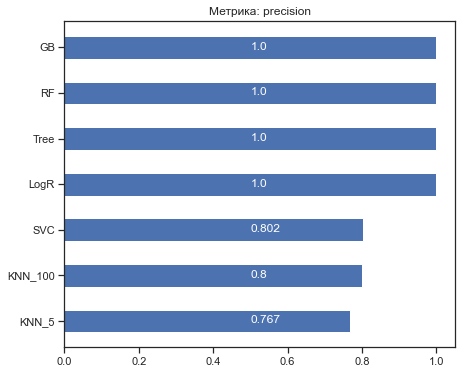

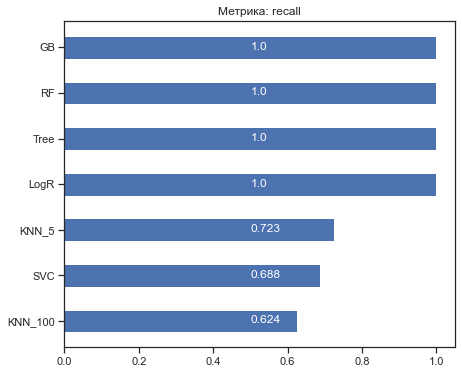

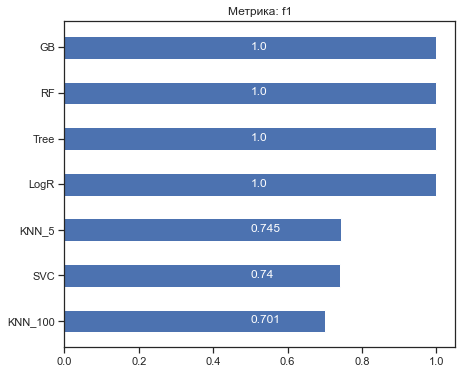

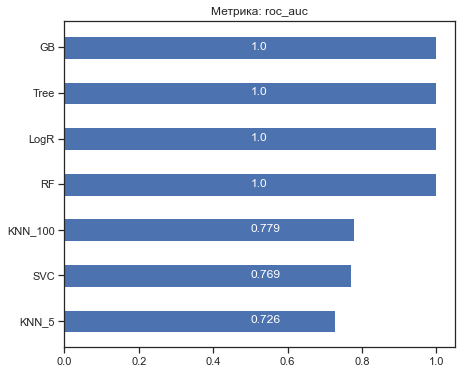

In [83]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: 4 модели: градиентный бустинг, дерево, логистическая регрессия и случайный лес показали одинаково высокий результат